In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 2.0

In [35]:
def midpoint(integrand,x_i,x_f,N_bins):
    h_step=np.float32((x_f-x_i)/N_bins)
    sum = np.float32(0)
    for i in range(N_bins):
        sum+= np.float32(integrand((i+np.float32(1/2))*h_step + x_i)*h_step)
    return np.float32(sum)

def trapezoid(integrand,x_i,x_f,N_bins):
    h_step=np.float32((x_f-x_i)/N_bins)
    sum = 0
    for i in range(N_bins-1):
        sum+=integrand((i+1)*h_step + x_i)*h_step
    return sum + np.float32(1/2)*(integrand(x_f)+integrand(x_i))*h_step

def simpson(integrand,x_i,x_f,N_bins):
    h_step=np.float32((x_f-x_i)/N_bins)
    if N_bins%2!=0:
        raise ValueError("Simpson's Rule requires an even number of bins, but you have specified a non-even number of bins.")
    sum = 0

    for i in range(np.int32(N_bins/2)):
        sum += 4*integrand((2*i+1)*h_step + x_i)

    for i in range(np.int32((N_bins/2) - 1)):
        sum += 2*integrand((2*i+2)*h_step + x_i)
        
    sum += integrand(x_f) + integrand(x_i)
    return sum*(h_step/3)


In [36]:
x_init=np.int32(0)
x_final=np.int32(1)
N_bins=np.int32(1000)

func = lambda t:np.exp(-t,dtype=np.float32)

test = midpoint(func,x_init,x_final,N_bins)
print(f'Using The Midpoint Method and 1000 bins, the value of the integral is {np.float32(test)}')
test1 = trapezoid(func,x_init,x_final,N_bins)
print(f'Using The Trapezoid Method and 1000 bins, the value of the integral is {np.float32(test1)}')
test2 = simpson(func,x_init,x_final,N_bins)
print(f'Using Simpson\'s Method and 1000 bins, the value of the integral is {np.float32(test2)}')

midpoint_of_N = lambda N : midpoint(func, x_init, x_final, N)
trapez_of_N = lambda N : trapezoid(func, x_init, x_final, N)
simpson_of_N = lambda N : simpson(func, x_init, x_final, N)

true_integral = -(np.exp(-1, dtype=np.float32) - np.exp(-0, dtype=np.float32))

e_rel_calc_midpt = lambda N : np.abs((midpoint_of_N(N)-true_integral)/true_integral,dtype=np.float32)
e_rel_calc_trapz = lambda N : np.abs((trapez_of_N(N)-true_integral)/true_integral,dtype=np.float32)
e_rel_calc_simps = lambda N : np.abs((simpson_of_N(N)-true_integral)/true_integral,dtype=np.float32)


Using The Midpoint Method and 1000 bins, the value of the integral is 0.6321207284927368
Using The Trapezoid Method and 1000 bins, the value of the integral is 0.632120668888092
Using Simpson's Method and 1000 bins, the value of the integral is 0.6321209073066711


In [37]:
N_samples = 1e2
N_array = 2*np.logspace(0,5,int(N_samples),dtype=np.int32)

mid_array = np.zeros(int(N_samples))
tra_array = np.zeros(int(N_samples))
sim_array = np.zeros(int(N_samples))

for i in range(len(N_array)):
    mid_array[i]=e_rel_calc_midpt(N_array[i])
    tra_array[i]=e_rel_calc_trapz(N_array[i])
    sim_array[i]=e_rel_calc_simps(N_array[i])

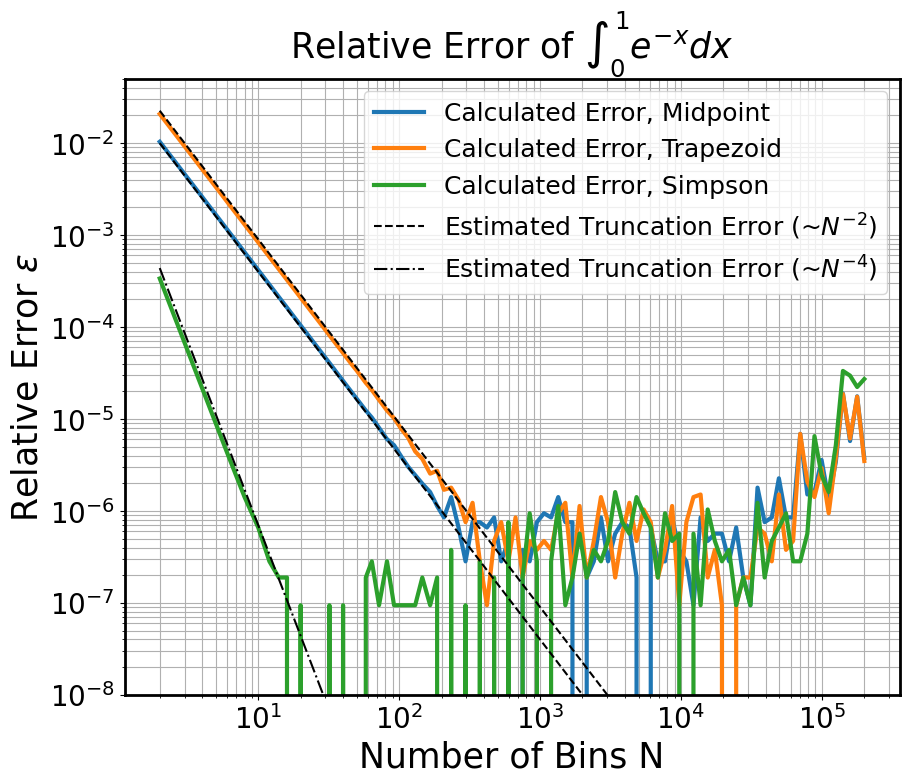

In [38]:
plt.figure(figsize=(10,8),dpi=100)
plt.loglog(N_array,mid_array,label='Calculated Error, Midpoint',lw=3)
plt.loglog(N_array,tra_array,label='Calculated Error, Trapezoid',lw=3)
plt.loglog(N_array,sim_array,label='Calculated Error, Simpson',lw=3)
plt.loglog(N_array,0.09/(N_array**2),label='Estimated Truncation Error (~' + r'$N^{-2}$'+')', linestyle='--',color='k')
plt.loglog(N_array,0.04/(N_array**2), linestyle='--',color='k')
plt.loglog(N_array,0.007/(N_array**4),label='Estimated Truncation Error (~' + r'$N^{-4}$'+')', linestyle='-.',color='k')
plt.ylim(1e-8,5e-2)
plt.grid(True,which='both')
plt.xlabel('Number of Bins N',fontsize=25)
plt.ylabel(r'Relative Error $\epsilon$',fontsize=25)
plt.title(r'Relative Error of $\int_{0}^{1} e^{-x} dx$',fontsize=25,pad=15)
plt.legend(fontsize=18,loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(labelbottom=True)
plt.tick_params(labelleft=True)
plt.savefig('./hw1_p2_relative_error.png')